In [1]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [6]:
!ls drive

'My Drive'


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
data=pd.read_csv("drive/My Drive/recipes_82k.csv")
data=data.drop(["category","image"],axis=1)

In [0]:
x=data.iloc[:,0:].values

In [4]:
x[0][0]

"['Set the racks in the middle and upper thirds of the oven and preheat the oven to 425 F', 'In a large skillet over medium heat, heat the olive oil until shimmering. Add the onion, garlic and red pepper flakes and cook until golden, stirring occasionally, about 5 minutes.', 'Add the fennel and cook until the vegetables are soft and translucent, an additional 3 to 5 minutes.', 'Reduce the heat to medium and add the tomatoes with their juices. Using the back of a wooden spoon, smash the tomatoes and cook for 5 minutes.', 'Add the basil, wine, olives, 1 teaspoon salt, and 1/8 teaspoon black pepper.', 'Reduce to low and simmer for 15 minutes, or until the sauce is slightly thickened, while you prepare the fish.', 'Pat the fillets dry, lightly spray them with cooking spray, and season with salt and pepper.', 'In a heavy ovenproof skillet over high heat, heat the olive oil until shimmering. Add the fillets, rounded-side down, and cook for 2 minutes.', 'Carefully flip the fillets with a meta

In [0]:
from string import punctuation

In [6]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [0]:
x[0][0].replace("['","").replace("']","")
listofuncleaned=[]
allcombined=[]
xcombined=[]
ycombined=[]
for uncleaned in x:
    try:
        uncleaned[0]=uncleaned[0].replace("['","").replace("']","").replace("(","").replace(") "," ").replace(".","").replace(",","").lower()
        
                            
        uncleaned[1]=uncleaned[1].replace("['","").replace("']","").replace("\'","").replace(" ("," ").replace(".","").replace(") "," ").replace(",","").lower()
        
        #uncleaned[2]=uncleaned[2]
        uncleaned[2]=uncleaned[2].replace("['","").replace("']","").replace("\'","").replace(" ("," ").replace(".","").replace(") "," ").replace(",","").lower()
        
        uncleaned[3]=uncleaned[3].lower().replace(".","").replace(",","")
        uncleaned[4]=uncleaned[4].lower().replace(".","").replace(",","")
        uncleaned[5]=uncleaned[5].lower().replace(".","").replace(",","")
        uncleaned[6]=uncleaned[6].lower().replace(".","").replace(",","")
        
        listofuncleaned.append(uncleaned)
        allcombined.append(uncleaned[0]+" "+uncleaned[2]+" "+uncleaned[2]+" "+uncleaned[3]+" "+uncleaned[4]+" "+uncleaned[5]+" "+uncleaned[6])
        xcombined.append(uncleaned[0]+" "+uncleaned[2]+" "+uncleaned[2]+" "+uncleaned[3]+" "+uncleaned[4]+" "+uncleaned[5])
        ycombined.append(uncleaned[6])
    except:
        pass
    
# for i in x:
#     x.remove("[").remove("]")

In [8]:
len(listofuncleaned)

58449

In [0]:
combinedtext=" ".join(allcombined)
word2idx={}
idx2word={}

for idx,word in enumerate(combinedtext.split(" ")):
    #idx2word[idx]=word
    word2idx[word]=idx
    
    

In [0]:

# feel free to use this import 
from collections import Counter

## Build a dictionary that maps words to integers
counts = Counter(combinedtext.split(" "))
vocab = sorted(counts, key=counts.get, reverse=True)
vocab_to_int = {word: ii for ii, word in enumerate(vocab, 1)}

## use the dict to tokenize each review in reviews_split
## store the tokenized reviews in reviews_ints
reviews_ints = []
for review in xcombined:
    
    reviews_ints.append([vocab_to_int[word] for word in review.split()])
tag_ints=[]  
for review in ycombined:
    
    tag_ints.append([vocab_to_int[word] for word in review.split()])

In [0]:
reversed_dictionary = dict(zip(vocab_to_int.values(), vocab_to_int.keys()))

In [0]:
vocabulary=len(vocab_to_int)

In [13]:
print('Unique words: ', len((vocab_to_int)))  # should ~ 74000+
print()

# print tokens in first review
print('Tokenized review: \n', reviews_ints[:1])
print('tags: \n', tag_ints[:1])

Unique words:  105395

Tokenized review: 
 [[109, 1, 1176, 9, 1, 741, 2, 2041, 1585, 11, 1, 65, 2, 158, 1, 65, 4, 1021, 251, 182, 5, 31, 129, 38, 45, 33, 33, 1, 39, 18, 16, 3656, 22, 1, 60, 37, 2, 55, 15, 287, 2, 47, 16, 153, 159, 379, 29, 68, 205, 412, 1, 456, 2, 47, 16, 1, 315, 127, 289, 2, 947, 167, 604, 23, 4, 68, 205, 2370, 1, 33, 4, 45, 2, 22, 1, 98, 8, 829, 654, 206, 1, 422, 11, 5, 628, 223, 2557, 1, 98, 2, 47, 13, 68, 205, 412, 1, 211, 106, 482, 3, 17, 12, 2, 410, 17, 42, 640, 2370, 4, 250, 2, 151, 13, 179, 25, 19, 16, 1, 41, 66, 285, 758, 450, 146, 732, 1, 4245, 3455, 1, 463, 139, 180, 301, 172, 8, 191, 301, 2, 99, 8, 12, 2, 640, 182, 5, 168, 1522, 129, 38, 225, 33, 33, 1, 39, 18, 16, 3656, 22, 1, 463, 11170, 264, 2, 47, 13, 6, 205, 2452, 838, 1, 463, 8, 5, 1209, 597, 2, 69, 1, 129, 9, 1, 65, 169, 16, 1, 256, 66, 807, 917, 947, 58, 4, 85, 205, 17866, 1, 65, 4, 1009, 2, 69, 1, 129, 30, 1, 2041, 321, 1009, 16, 1, 712, 11, 1, 463, 127, 153, 79, 6, 4, 20, 205, 1379, 1, 463, 30, 12

In [14]:

# outlier review stats
review_lens = Counter([len(x) for x in reviews_ints])
print("Zero-length reviews: {}".format(review_lens[0]))
print("Maximum review length: {}".format(max(review_lens)))


Zero-length reviews: 0
Maximum review length: 3127


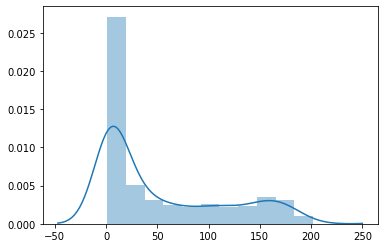

In [15]:
import seaborn as sns
sns.distplot(list(review_lens.values()))

In [0]:
import numpy as np
def pad_features(reviews_ints, seq_length):
    ''' Return features of review_ints, where each review is padded with 0's 
        or truncated to the input seq_length.
    '''
    
    # getting the correct rows x cols shape
    features = np.zeros((len(reviews_ints), seq_length), dtype=int)

    # for each review, I grab that review and 
    for i, row in enumerate(reviews_ints):
        features[i, -len(row):] = np.array(row)[:seq_length]
    
    return features

In [0]:
seq_length=3000
outseq_length=3000
featurex=pad_features(reviews_ints,seq_length)
featurey=pad_features(tag_ints,outseq_length)

In [0]:
featurex=pad_features(reviews_ints,seq_length)
featurey=pad_features(tag_ints,outseq_length)

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(featurex, featurey, test_size=0.2, random_state=42)

In [21]:
from sklearn.metrics import mean_squared_error
from keras.models import Model
from keras.layers import Dense, LSTM, TimeDistributed, Input,Embedding,Bidirectional
from random import randint
from numpy import array
from numpy import argmax
from numpy import array_equal
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import TimeDistributed
from keras.layers import RepeatVector
from keras import losses

Using TensorFlow backend.


In [0]:
xtrain=[]
ytrain=[]
for i,j in zip(X_train,y_train):
  xtrain.append(i.reshape(1,3000))
  ytrain.append(j.reshape(1,3000))

In [23]:
np.asarray(xtrain).shape

(46759, 1, 3000)

In [24]:
from keras.layers import Activation, Dense
hidden_size=128
model = Sequential()
#model.add(Embedding(vocabulary, hidden_size, input_length = 3000))
model.add(LSTM(3000,return_sequences=True,input_shape=(1,3000)))
model.add(TimeDistributed(Dense(3000,activation="relu")))
#model.add(Bidirectional(LSTM(40,return_sequences=False)))
#model.add(Bidirectional(LSTM(40)))

#model.add(Dense(40, activation='sigmoid'))
model.compile(loss=losses.mean_squared_error, optimizer='adam')

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1, 3000)           72012000  
_________________________________________________________________
time_distributed_1 (TimeDist (None, 1, 3000)           9003000   
Total params: 81,015,000
Trainable params: 81,015,000
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.fit(np.asarray(xtrain),np.asarray(ytrain),epochs=1,batch_size=32,verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/1





46759/46759 [==============================] - 72s 2ms/step - loss: 1488484.1920


In [44]:
# Define an input sequence and process it.
encoder_inputs = Input(shape=(None, 3000))
encoder = Bidirectional(LSTM(3000, return_state=True))
#encoder = Bidirectional(LSTM(3000, return_state=True))
print( len(encoder(encoder_inputs)))
print(encoder(encoder_inputs))
encoder_outputs, state_h, state_c,_,_ = encoder(encoder_inputs)
# We discard `encoder_outputs` and only keep the states.
encoder_states = [state_h, state_c]
print(encoder_states)
# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None, 3000))
# We set up our decoder to return full output sequences,
# and to return internal states as well. We don't use the
# return states in the training model, but we will use them in inference.
decoder_lstm =LSTM(3000, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_inputs,
                                     initial_state=encoder_states)
decoder_dense = Dense(3000, activation='relu')
decoder_outputs = decoder_dense(decoder_outputs)
# Define the model that will turn
# `encoder_input_data` & `decoder_input_data` into `decoder_target_data`
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

5
[<tf.Tensor 'bidirectional_10_1/concat:0' shape=(?, 6000) dtype=float32>, <tf.Tensor 'bidirectional_10_1/while/Exit_2:0' shape=(?, 3000) dtype=float32>, <tf.Tensor 'bidirectional_10_1/while/Exit_3:0' shape=(?, 3000) dtype=float32>, <tf.Tensor 'bidirectional_10_1/while_1/Exit_2:0' shape=(?, 3000) dtype=float32>, <tf.Tensor 'bidirectional_10_1/while_1/Exit_3:0' shape=(?, 3000) dtype=float32>]
[<tf.Tensor 'bidirectional_10_2/while/Exit_2:0' shape=(?, 3000) dtype=float32>, <tf.Tensor 'bidirectional_10_2/while/Exit_3:0' shape=(?, 3000) dtype=float32>]


In [45]:
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_17 (InputLayer)           (None, None, 3000)   0                                            
__________________________________________________________________________________________________
input_18 (InputLayer)           (None, None, 3000)   0                                            
__________________________________________________________________________________________________
bidirectional_10 (Bidirectional [(None, 6000), (None 144024000   input_17[0][0]                   
__________________________________________________________________________________________________
lstm_19 (LSTM)                  [(None, None, 3000), 72012000    input_18[0][0]                   
                                                                 bidirectional_10[2][1]     

In [0]:
model.compile(optimizer="adam", loss=losses.mean_squared_error)

In [47]:
model.fit([np.asarray(xtrain), np.asarray(ytrain)], np.asarray(ytrain),
          batch_size=32,
          epochs=5
          )

ValueError: ignored

In [0]:
from sklearn.metrics import mean_squared_error
from keras.models import Model
from keras.layers import Dense, LSTM, TimeDistributed, Input,Embedding

Using TensorFlow backend.


In [0]:
def rmsle(y_true, y_pred):
    return mean_squared_error(y_true, y_pred)**0.5

In [0]:
import keras

In [0]:
from keras import backend as K
def rmsle(y, y0):
    #assert len(y) == len(y0)
    return np.sqrt(np.mean(np.power(np.log1p(y)-np.log1p(y0), 2)))

#looping error calc
def rmsle_loop(y, y_pred):
	assert len(y) == len(y_pred)
	terms_to_sum = [(math.log(y_pred[i] + 1) - math.log(y[i] + 1)) ** 2.0 for i,pred in enumerate(y_pred)]
	return (sum(terms_to_sum) * (1.0/len(y))) ** 0.5

In [0]:
X_train.shape

(46759, 3000)

In [0]:
tags=data["tags"]

In [0]:
tagdict={}
lenoftags=[]
alltags=[]
for tag in tags:
    try:
        taglists=tag.lower().split(",")
        lenoftags.append(len(set(taglists)))
        alltags.append(taglists)
        for taglist in taglists:
            tagdict.setdefault(taglist.strip(),0)
            tagdict[taglist.strip()]=tagdict[taglist.strip()]+1
    except:
        pass
    

In [0]:
len(tagdict.keys())

765

In [0]:
alltags[lenoftags.index(max(lenoftags))]

['easy dessert recipes',
 'dessert',
 'easy',
 'easy side dish recipes',
 'side dish',
 'easy breakfast recipes',
 'breakfast',
 'easy brunch recipes',
 'brunch',
 'easy lunch recipes',
 'lunch',
 'healthy breakfast',
 'healthy',
 'healthy brunch recipes',
 'healthy dinner',
 'healthy lunch',
 'fruit dessert recipes',
 'fruit',
 'american',
 'fruit salad',
 'honeydew recipes',
 'banana',
 'blueberry',
 'lemon',
 'watermelon recipes',
 'melon recipes',
 'kiwi recipes',
 'heart-healthy',
 'low-cholesterol',
 'gluten free',
 'high fiber',
 'low sodium',
 'low calorie',
 'low-fat',
 'summer',
 'vegan']

In [0]:
taglistX=list(tagdict.keys())
taglistY=list(tagdict.values())

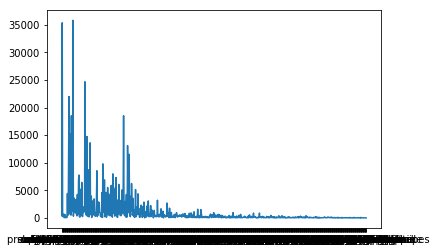

In [0]:
plt.plot(taglistX,taglistY)

In [0]:
import seaborn as sns

In [0]:
data.describe()

,category,cooking_method,cuisine,image,ingredients,prep_time,recipe_name,serves,tags
count,18107,82245,82230,82245,82245,58630,82245,82244,82011
unique,1,62268,23,37725,61198,389,55838,7494,57039
top,[],[],[],https://food.fnr.sndimg.com/content/dam/images...,[],P0Y0M0DT0H10M0.000S,Guacamole,4 servings,Gluten Free
freq,18107,57,80847,29593,1253,11060,38,20484,530


In [0]:
huacamole=data[data["recipe_name"]=="Guacamole"]

In [0]:
huacamole["image"]

39842    https://food.fnr.sndimg.com/content/dam/images...
39843    https://food.fnr.sndimg.com/content/dam/images...
39844    https://food.fnr.sndimg.com/content/dam/images...
39845    https://food.fnr.sndimg.com/content/dam/images...
39846    https://food.fnr.sndimg.com/content/dam/images...
39847    https://food.fnr.sndimg.com/content/dam/images...
39848    https://food.fnr.sndimg.com/content/dam/images...
39849    https://food.fnr.sndimg.com/content/dam/images...
39850    https://food.fnr.sndimg.com/content/dam/images...
39851    https://food.fnr.sndimg.com/content/dam/images...
39852    https://food.fnr.sndimg.com/content/dam/images...
39853    https://food.fnr.sndimg.com/content/dam/images...
39854    https://food.fnr.sndimg.com/content/dam/images...
39855    https://cook.fnr.sndimg.com/content/dam/images...
39857    https://food.fnr.sndimg.com/content/dam/images...
39859    https://food.fnr.sndimg.com/content/dam/images...
39860    https://food.fnr.sndimg.com/content/dam/images.

In [0]:
import re

In [0]:
re.findall(r"H[0-9]*M[0-9]","P0Y0M0DT0H10M0.000S")

['H10M0']